<a href="https://colab.research.google.com/github/LuchoValr/Machine_Learning/blob/main/clase_machine2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Regresión Lineal
##Nombre: Luis Valera

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/train.csv')
data[['GrLivArea', 'SalePrice']].head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


In [ ]:
data[['GrLivArea', 'SalePrice']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1460 non-null   int64
 1   SalePrice  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


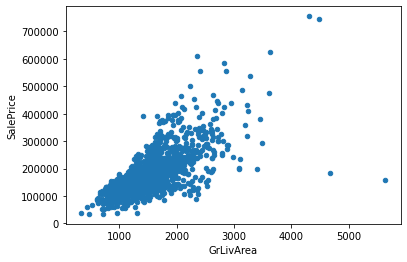

In [ ]:
data.plot.scatter(x = 'GrLivArea', y = 'SalePrice')
plt.show()

In [ ]:
w = 125
b = 0

x = np.linspace(0, data['GrLivArea'].max(), 100)
y = (w*x)+b 

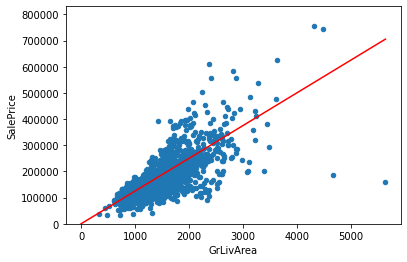

In [ ]:
data.plot.scatter(x = 'GrLivArea', y = 'SalePrice')
plt.plot(x, y, '-r')
plt.ylim(0, data['SalePrice'].max()*1.1)
plt.show()

In [ ]:
#Prediccion

data['Pred'] = data['GrLivArea']*w+b

#Funcion de error

data['Diff'] = data['Pred'] - data['SalePrice']
data['Cuad'] = data['Diff']**2
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Pred,Diff,Cuad
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,213750,5250,27562500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,157750,-23750,564062500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,223250,-250,62500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,214625,74625,5568890625
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,274750,24750,612562500


In [ ]:
w = np.linspace(50, 200, 50)
grid_error = pd.DataFrame(w, columns = ['w'])
grid_error.head()

,w
0,50.000000
1,53.061224
2,56.122449
3,59.183673
4,62.244898


In [ ]:
def sum_error(w, train):
  b = 0
  data['Pred'] = data['GrLivArea']*w+b
  data['Diff'] = data['Pred'] - data['SalePrice']
  data['Cuad'] = data['Diff']**2
  data.head()
  return(data['Cuad'].mean())

In [ ]:
grid_error['error'] = grid_error['w'].apply(lambda x: sum_error(x, train = data))
grid_error.head()

,w,error
0,50.000000,1.509658e+10
1,53.061224,1.404857e+10
2,56.122449,1.304878e+10
3,59.183673,1.209720e+10
4,62.244898,1.119384e+10


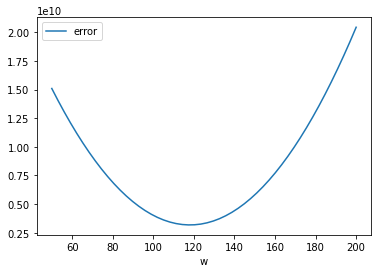

In [ ]:
grid_error.plot(x = 'w', y = 'error')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

X_train = np.array(data['GrLivArea']).reshape((-1, 1))
Y_train = np.array(data['SalePrice'])

model = LinearRegression(fit_intercept=False)
model.fit(X_train, Y_train)

LinearRegression(fit_intercept=False)

In [ ]:
print(f'intercepto (b): {model.intercept_}')
print(f'pendiente (w): {model.coef_}')


intercepto (b): 0.0
pendiente (w): [118.06909986]
